In [8]:
import pandas as pd

In [9]:
file_path = 'C:/Users/HomePC/Downloads/data.csv'

In [10]:
data = pd.read_csv(file_path)

In [11]:
# Display the first few rows of the data
data.head()

,Date and time;systolic pressure (mm Hg);diastolic pressure (mm Hg);heart rate (1/min)
16.03.2024,08:20;164;97;74
16.03.2024,15:24;146;86;76
17.03.2024,06:59;146;84;72
17.03.2024,19:45;154;88;72
19.03.2024,07:24;154;91;70


In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date and time;systolic pressure (mm Hg);diastolic pressure (mm Hg);heart rate (1/min)    0
dtype: int64


In [13]:
# Handle missing values
# Example strategies:
# - Drop rows with missing values: data = data.dropna()
# - Fill missing values with a specific value (e.g., 0 or the mean): data = data.fillna(value)

# For demonstration, let's fill numeric columns with the mean and categorical columns with mode
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [14]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [15]:
# Remove duplicates
data = data.drop_duplicates()

In [16]:
# Load the data with the correct delimiter
data = pd.read_csv(file_path, delimiter=';')

In [17]:
# Replace the comma and space with a space in the 'Date and time' column
data['Date and time'] = data['Date and time'].str.replace(',', ' ')

In [18]:
# Convert the 'Date and time' column to a proper datetime format
data['Date and time'] = pd.to_datetime(data['Date and time'], format='%d.%m.%Y %H:%M')

In [19]:
# Create separate 'Date' and 'Time' columns
data['Date'] = data['Date and time'].dt.date
data['Time'] = data['Date and time'].dt.time

In [20]:
# Drop the original 'Date and time' column
data = data.drop(columns=['Date and time'])

In [21]:
# Reorder columns for better readability
data = data[['Date', 'Time', 'systolic pressure (mm Hg)', 'diastolic pressure (mm Hg)', 'heart rate (1/min)']]

In [22]:
# Display the cleaned data
print(data.head())

         Date      Time  systolic pressure (mm Hg)  \
0  2024-03-16  08:20:00                        164   
1  2024-03-16  15:24:00                        146   
2  2024-03-17  06:59:00                        146   
3  2024-03-17  19:45:00                        154   
4  2024-03-19  07:24:00                        154   

   diastolic pressure (mm Hg)  heart rate (1/min)  
0                          97                  74  
1                          86                  76  
2                          84                  72  
3                          88                  72  
4                          91                  70  


In [23]:
# Rename columns (if needed)
# Example: data.rename(columns={'old_name': 'new_name'}, inplace=True)

# Save the cleaned data to a new CSV file
output_file_path = 'C:/Users/HomePC/Downloads/cleaned_data_output.csv'
data.to_csv(output_file_path, index=False)

In [24]:
# Display the cleaned data
print(data.head())

         Date      Time  systolic pressure (mm Hg)  \
0  2024-03-16  08:20:00                        164   
1  2024-03-16  15:24:00                        146   
2  2024-03-17  06:59:00                        146   
3  2024-03-17  19:45:00                        154   
4  2024-03-19  07:24:00                        154   

   diastolic pressure (mm Hg)  heart rate (1/min)  
0                          97                  74  
1                          86                  76  
2                          84                  72  
3                          88                  72  
4                          91                  70  


In [25]:
# Output file path for reference
print(f"Cleaned data saved to: {output_file_path}")

Cleaned data saved to: C:/Users/HomePC/Downloads/cleaned_data_output.csv


In [26]:
import os
print(os.getcwd())

C:\Users\HomePC


T-Test Results:
Systolic Pressure: t-statistic = 4.048615316135721, p-value = 0.0001327592632315884
Diastolic Pressure: t-statistic = 3.4128870654060086, p-value = 0.0010793359096909303
Heart Rate: t-statistic = 0.8615005729340038, p-value = 0.3919464336729743

Correlation Matrix:
                            systolic pressure (mm Hg)  \
systolic pressure (mm Hg)                    1.000000   
diastolic pressure (mm Hg)                   0.816510   
heart rate (1/min)                           0.057752   

                            diastolic pressure (mm Hg)  heart rate (1/min)  
systolic pressure (mm Hg)                     0.816510            0.057752  
diastolic pressure (mm Hg)                    1.000000           -0.151672  
heart rate (1/min)                           -0.151672            1.000000  


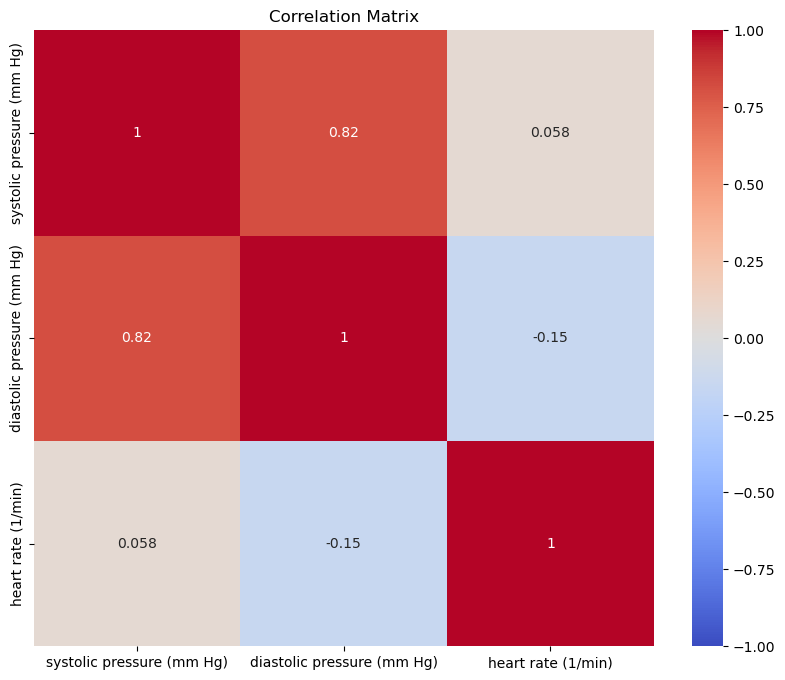

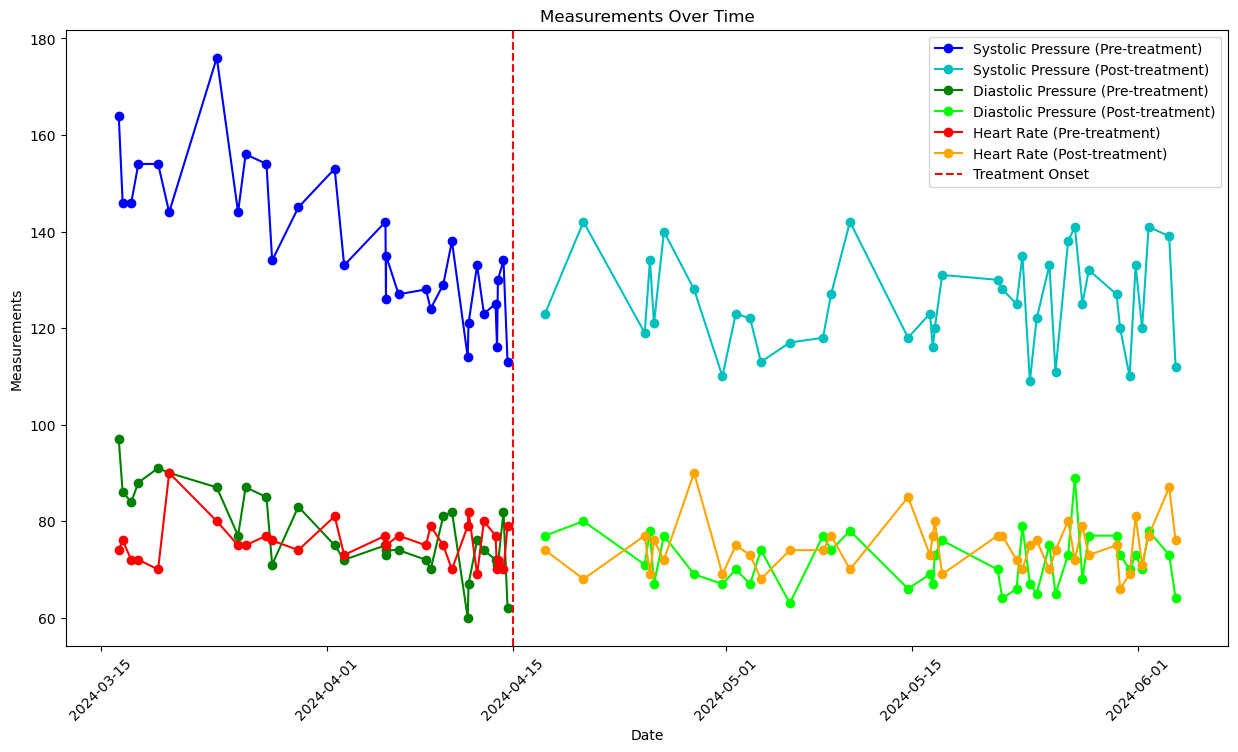

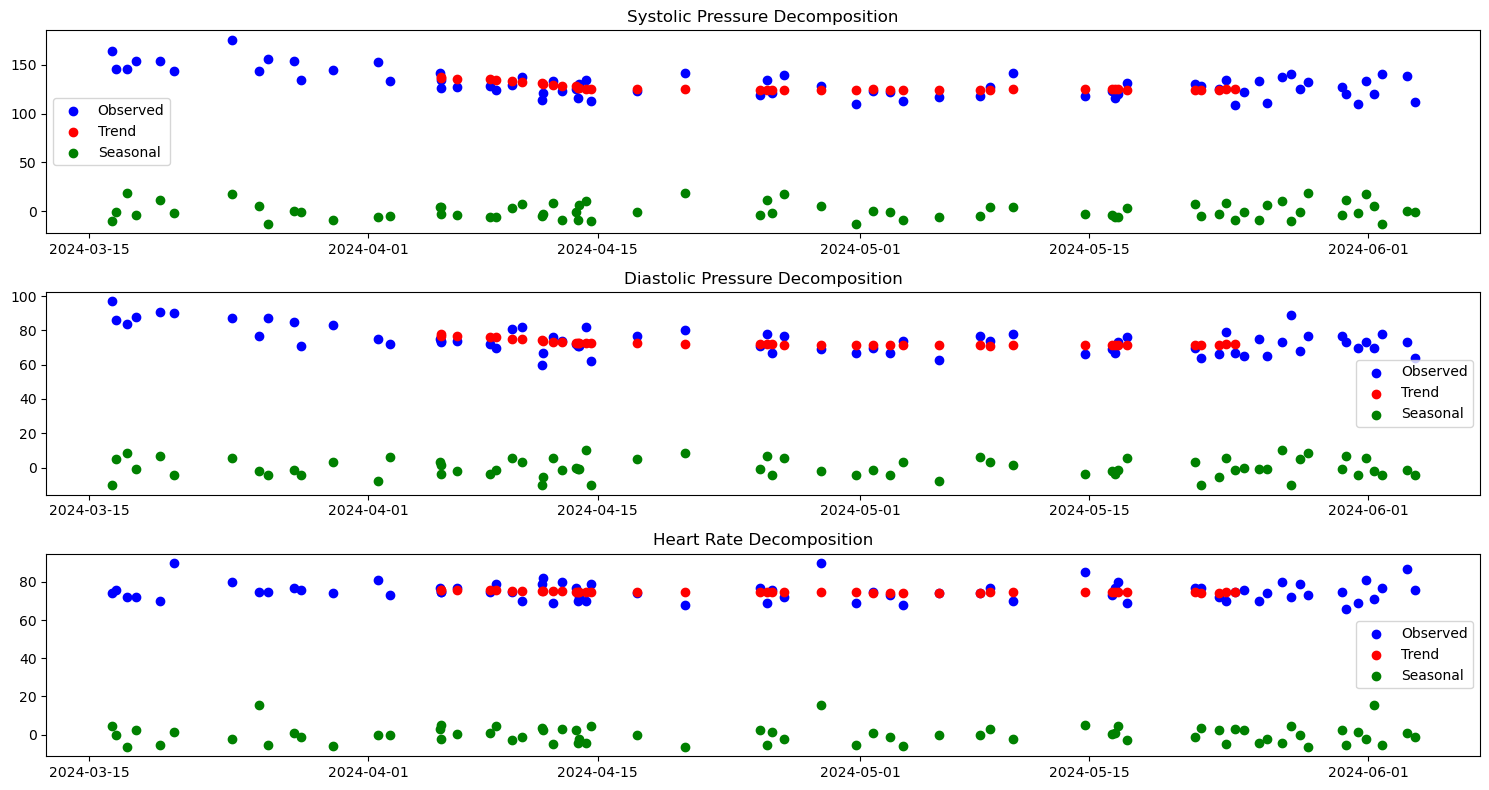

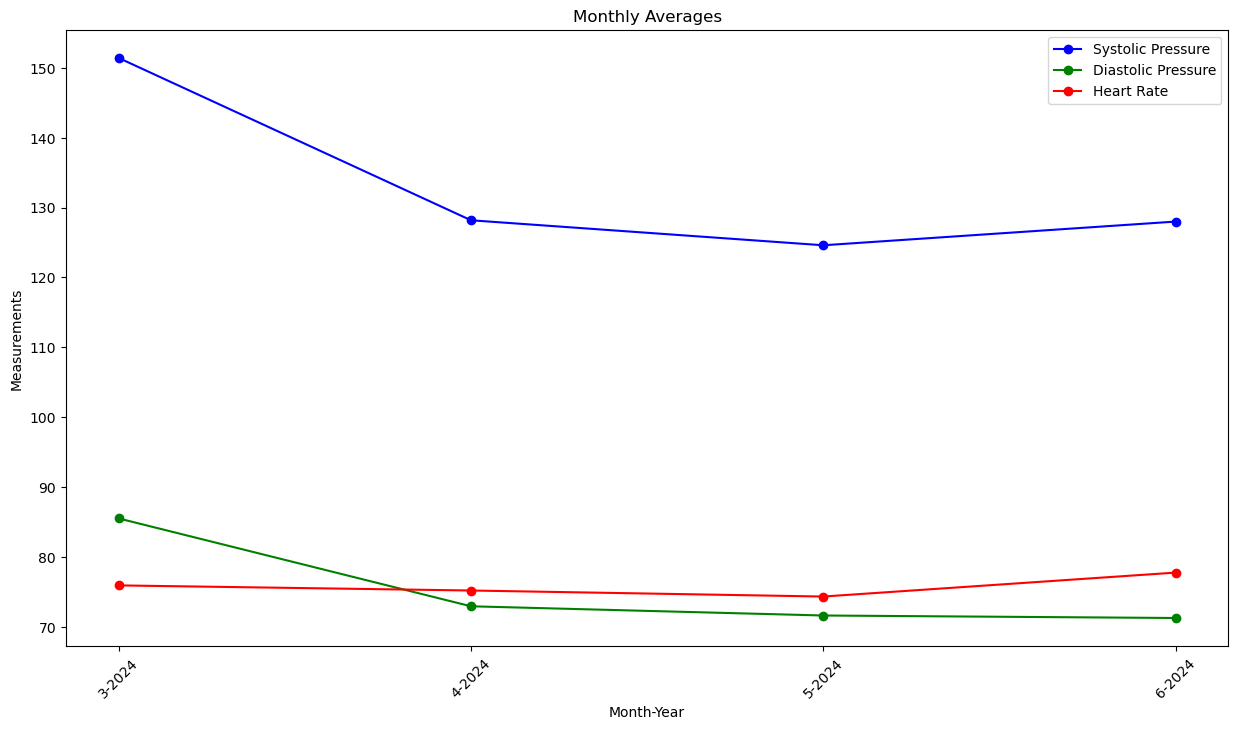

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = 'C:/Users/HomePC/Downloads/cleaned_data_output.csv'
data = pd.read_csv(file_path)

# Convert Date and Time to datetime objects
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Set the treatment start date
treatment_start_date = pd.Timestamp('2024-04-15')

# Split data into pre-treatment and post-treatment
pre_treatment = data[data['Datetime'] < treatment_start_date]
post_treatment = data[data['Datetime'] >= treatment_start_date]

# Perform t-tests
t_test_results = {
    "Systolic Pressure": ttest_ind(pre_treatment['systolic pressure (mm Hg)'], post_treatment['systolic pressure (mm Hg)']),
    "Diastolic Pressure": ttest_ind(pre_treatment['diastolic pressure (mm Hg)'], post_treatment['diastolic pressure (mm Hg)']),
    "Heart Rate": ttest_ind(pre_treatment['heart rate (1/min)'], post_treatment['heart rate (1/min)'])
}

# Print t-test results
print("T-Test Results:")
for key, result in t_test_results.items():
    print(f"{key}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

# Calculate the correlation matrix
correlation_matrix = data[['systolic pressure (mm Hg)', 'diastolic pressure (mm Hg)', 'heart rate (1/min)']].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Plotting all three measurements over time
plt.figure(figsize=(15, 8))
plt.plot(pre_treatment['Datetime'], pre_treatment['systolic pressure (mm Hg)'], marker='o', linestyle='-', color='b', label='Systolic Pressure (Pre-treatment)')
plt.plot(post_treatment['Datetime'], post_treatment['systolic pressure (mm Hg)'], marker='o', linestyle='-', color='c', label='Systolic Pressure (Post-treatment)')
plt.plot(pre_treatment['Datetime'], pre_treatment['diastolic pressure (mm Hg)'], marker='o', linestyle='-', color='g', label='Diastolic Pressure (Pre-treatment)')
plt.plot(post_treatment['Datetime'], post_treatment['diastolic pressure (mm Hg)'], marker='o', linestyle='-', color='lime', label='Diastolic Pressure (Post-treatment)')
plt.plot(pre_treatment['Datetime'], pre_treatment['heart rate (1/min)'], marker='o', linestyle='-', color='r', label='Heart Rate (Pre-treatment)')
plt.plot(post_treatment['Datetime'], post_treatment['heart rate (1/min)'], marker='o', linestyle='-', color='orange', label='Heart Rate (Post-treatment)')
plt.axvline(x=treatment_start_date, color='r', linestyle='--', label='Treatment Onset')
plt.title('Measurements Over Time')
plt.xlabel('Date')
plt.ylabel('Measurements')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('measurements_over_time.png')
plt.show()

# Time Series Decomposition for systolic pressure
systolic_series = data.set_index('Datetime')['systolic pressure (mm Hg)']
systolic_decomposition = seasonal_decompose(systolic_series, model='additive', period=30)

# Time Series Decomposition for diastolic pressure
diastolic_series = data.set_index('Datetime')['diastolic pressure (mm Hg)']
diastolic_decomposition = seasonal_decompose(diastolic_series, model='additive', period=30)

# Time Series Decomposition for heart rate
heart_rate_series = data.set_index('Datetime')['heart rate (1/min)']
heart_rate_decomposition = seasonal_decompose(heart_rate_series, model='additive', period=30)

# Plotting the decompositions together in scatter plots
plt.figure(figsize=(15, 8))

# Systolic pressure decomposition
plt.subplot(3, 1, 1)
plt.scatter(systolic_decomposition.observed.index, systolic_decomposition.observed, label='Observed', color='blue')
plt.scatter(systolic_decomposition.trend.index, systolic_decomposition.trend, label='Trend', color='red')
plt.scatter(systolic_decomposition.seasonal.index, systolic_decomposition.seasonal, label='Seasonal', color='green')
plt.title('Systolic Pressure Decomposition')
plt.legend()

# Diastolic pressure decomposition
plt.subplot(3, 1, 2)
plt.scatter(diastolic_decomposition.observed.index, diastolic_decomposition.observed, label='Observed', color='blue')
plt.scatter(diastolic_decomposition.trend.index, diastolic_decomposition.trend, label='Trend', color='red')
plt.scatter(diastolic_decomposition.seasonal.index, diastolic_decomposition.seasonal, label='Seasonal', color='green')
plt.title('Diastolic Pressure Decomposition')
plt.legend()

# Heart rate decomposition
plt.subplot(3, 1, 3)
plt.scatter(heart_rate_decomposition.observed.index, heart_rate_decomposition.observed, label='Observed', color='blue')
plt.scatter(heart_rate_decomposition.trend.index, heart_rate_decomposition.trend, label='Trend', color='red')
plt.scatter(heart_rate_decomposition.seasonal.index, heart_rate_decomposition.seasonal, label='Seasonal', color='green')
plt.title('Heart Rate Decomposition')
plt.legend()

plt.tight_layout()
plt.savefig('decomposition_all_scatter.png')
plt.show()

# Extracting month and year for aggregation
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year

# Calculate monthly averages for numeric columns only
monthly_averages = data.groupby(['Year', 'Month'])[['systolic pressure (mm Hg)', 'diastolic pressure (mm Hg)', 'heart rate (1/min)']].mean().reset_index()

# Plotting monthly averages together
plt.figure(figsize=(15, 8))

# Systolic pressure monthly averages
plt.plot(monthly_averages['Month'].astype(str) + '-' + monthly_averages['Year'].astype(str), 
         monthly_averages['systolic pressure (mm Hg)'], marker='o', linestyle='-', color='b', label='Systolic Pressure')

# Diastolic pressure monthly averages
plt.plot(monthly_averages['Month'].astype(str) + '-' + monthly_averages['Year'].astype(str), 
         monthly_averages['diastolic pressure (mm Hg)'], marker='o', linestyle='-', color='g', label='Diastolic Pressure')

# Heart rate monthly averages
plt.plot(monthly_averages['Month'].astype(str) + '-' + monthly_averages['Year'].astype(str), 
         monthly_averages['heart rate (1/min)'], marker='o', linestyle='-', color='r', label='Heart Rate')

plt.title('Monthly Averages')
plt.xlabel('Month-Year')
plt.ylabel('Measurements')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('monthly_averages.png')
plt.show()


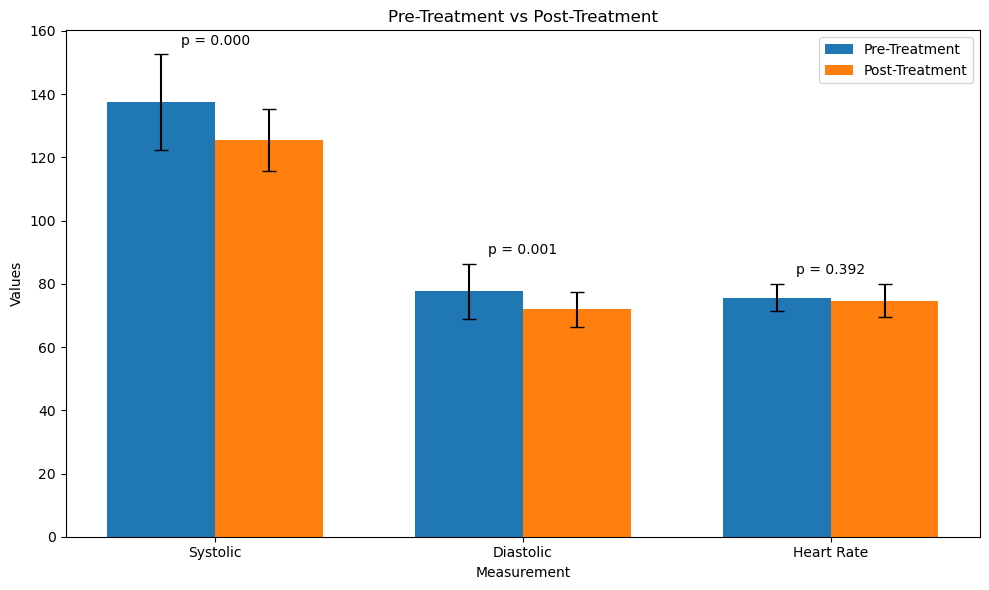

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
file_path = 'C:/Users/HomePC/Downloads/cleaned_data_output.csv'
data = pd.read_csv(file_path)

# Convert Date and Time to datetime objects
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Set the treatment start date
treatment_start_date = pd.Timestamp('2024-04-15')

# Split data into pre-treatment and post-treatment
pre_treatment = data[data['Datetime'] < treatment_start_date]
post_treatment = data[data['Datetime'] >= treatment_start_date]

# Calculate means and standard deviations
means = {
    'Pre-Treatment': {
        'Systolic': pre_treatment['systolic pressure (mm Hg)'].mean(),
        'Diastolic': pre_treatment['diastolic pressure (mm Hg)'].mean(),
        'Heart Rate': pre_treatment['heart rate (1/min)'].mean(),
    },
    'Post-Treatment': {
        'Systolic': post_treatment['systolic pressure (mm Hg)'].mean(),
        'Diastolic': post_treatment['diastolic pressure (mm Hg)'].mean(),
        'Heart Rate': post_treatment['heart rate (1/min)'].mean(),
    }
}

std_devs = {
    'Pre-Treatment': {
        'Systolic': pre_treatment['systolic pressure (mm Hg)'].std(),
        'Diastolic': pre_treatment['diastolic pressure (mm Hg)'].std(),
        'Heart Rate': pre_treatment['heart rate (1/min)'].std(),
    },
    'Post-Treatment': {
        'Systolic': post_treatment['systolic pressure (mm Hg)'].std(),
        'Diastolic': post_treatment['diastolic pressure (mm Hg)'].std(),
        'Heart Rate': post_treatment['heart rate (1/min)'].std(),
    }
}

# Perform t-tests
t_test_results = {
    'Systolic': ttest_ind(pre_treatment['systolic pressure (mm Hg)'], post_treatment['systolic pressure (mm Hg)']),
    'Diastolic': ttest_ind(pre_treatment['diastolic pressure (mm Hg)'], post_treatment['diastolic pressure (mm Hg)']),
    'Heart Rate': ttest_ind(pre_treatment['heart rate (1/min)'], post_treatment['heart rate (1/min)'])
}

# Data for plotting
categories = ['Systolic', 'Diastolic', 'Heart Rate']
pre_means = [means['Pre-Treatment'][cat] for cat in categories]
post_means = [means['Post-Treatment'][cat] for cat in categories]
pre_std = [std_devs['Pre-Treatment'][cat] for cat in categories]
post_std = [std_devs['Post-Treatment'][cat] for cat in categories]
p_values = [t_test_results[cat].pvalue for cat in categories]

# Bar plot with error bars
x = range(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x, pre_means, width, yerr=pre_std, label='Pre-Treatment', capsize=5)
bar2 = ax.bar([p + width for p in x], post_means, width, yerr=post_std, label='Post-Treatment', capsize=5)

# Annotating p-values
for i in range(len(categories)):
    x_pos = i + width / 2
    y_pos = max(pre_means[i] + pre_std[i], post_means[i] + post_std[i]) + 2
    ax.text(x_pos, y_pos, f'p = {p_values[i]:.3f}', ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Measurement')
ax.set_ylabel('Values')
ax.set_title('Pre-Treatment vs Post-Treatment')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.savefig('p_value_results.png')
plt.show()
